# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
# Unity ml-agents path
import sys
sys.path.append("../python/")

In [2]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
env = UnityEnvironment(file_name="../Tennis_Windows_x86_64/Tennis.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [6]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    t = 0
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.array([[t * 0.05, .5 + t*0.05], [t*0.05, .5+t*0.05]])
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        t += 1
        if np.any(dones):                                  # exit loop if episode finished
            print('break at step{}'.format(t))
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

break at step18
Score (max over agents) from episode 1: 0.0
break at step18
Score (max over agents) from episode 2: 0.0
break at step17
Score (max over agents) from episode 3: 0.0
break at step24
Score (max over agents) from episode 4: 0.0
break at step14
Score (max over agents) from episode 5: 0.0


When finished, you can close the environment.

In [7]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
import numpy as np
import random
import copy
from collections import namedtuple, deque

import torch.optim as optim
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

from copy import deepcopy

BUFFER_SIZE = int(1e6)  # replay buffer size
BATCH_SIZE = 64         # minibatch size
GAMMA = 0.95            # discount factor
TAU_ACTOR = 1e-2              # for soft update of target parameters
TAU_CRITIC = 1e-2              # for soft update of target parameters
LR_ACTOR = 1e-4         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
THETA = 0.1
SIGMA = 0.15
LEARN_EVERY = 50       # learning timestep interval
LEARN_NUM = 1           # number of learning passes


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return (-lim, lim)


class Actor(nn.Module):
    """Actor (Policy) Model."""

    def __init__(self, state_size, action_size, seed, fc1_units=400, fc2_units=300):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fc1_units (int): Number of nodes in first hidden layer
            fc2_units (int): Number of nodes in second hidden layer
        """
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = nn.Linear(state_size, fc1_units)
        self.fc2 = nn.Linear(fc1_units, fc2_units)
        self.fc3 = nn.Linear(fc2_units, action_size)
        self.reset_parameters()

    def reset_parameters(self):
        self.fc1.weight.data.uniform_(*hidden_init(self.fc1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state):
        """Build an actor (policy) network that maps states -> actions."""
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x))


class Critic(nn.Module):
    """Critic (Value) Model."""

    def __init__(self, state_size, action_size, seed, fcs1_units=200, fc2_units=200, fc3_units=200):
        """Initialize parameters and build model.
        Params
        ======
            state_size (int): Dimension of each state
            action_size (int): Dimension of each action
            seed (int): Random seed
            fcs1_units (int): Number of nodes in the first hidden layer
            fc2_units (int): Number of nodes in the second hidden layer
        """
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fcs1 = nn.Linear(state_size, fcs1_units)
        self.fc2 = nn.Linear(fcs1_units+action_size, fc2_units)
        self.fc3 = nn.Linear(fc2_units, fc3_units)
        self.fc4 = nn.Linear(fc3_units, 1)
        self.reset_parameters()

    def reset_parameters(self):
        self.fcs1.weight.data.uniform_(*hidden_init(self.fcs1))
        self.fc2.weight.data.uniform_(*hidden_init(self.fc2))
        self.fc3.weight.data.uniform_(*hidden_init(self.fc3))
        self.fc4.weight.data.uniform_(-3e-3, 3e-3)

    def forward(self, state, actions):
        """Build a critic (value) network that maps (state, action) pairs -> Q-values."""
        xs = F.relu(self.fcs1(state))
        x = torch.cat((xs, actions), dim=1)
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return self.fc4(x)

    
class OUNoise:
    """Ornstein-Uhlenbeck process."""

    def __init__(self, size, seed, mu=0., theta=0.15, sigma=0.2):
        """Initialize parameters and noise process."""
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()

    def reset(self):
        """Reset the internal state (= noise) to mean (mu)."""
        self.state = copy.copy(self.mu)

    def sample(self):
        """Update internal state and return it as a noise sample."""
        x = self.state
        dx = self.theta * (self.mu - x) + self.sigma * np.array([random.random() for _ in range(len(x))])
        self.state = x + dx
        return self.state


class ReplayBuffer:
    """Fixed-size buffer to store experience tuples."""

    def __init__(self, action_size, buffer_size, batch_size, seed, num_agents):
        """Initialize a ReplayBuffer object.
        Params
        ======
            buffer_size (int): maximum size of buffer
            batch_size (int): size of each training batch
        """
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size)  # internal memory (deque)
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names=["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        self.num_agents = num_agents

    def add(self, state, action, reward, next_state, done):
        """Add a new experience to memory."""
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)

    def sample(self):
        """Randomly sample a batch of experiences from memory."""
        experiences = random.sample(self.memory, k=self.batch_size)

        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)

        return (states, actions, rewards, next_states, dones)

    def __len__(self):
        """Return the current size of internal memory."""
        return len(self.memory)


In [9]:

class Agent:
    """Interacts with and learns from the environment."""

    def __init__(self, state_size, action_size, num_agents, random_seed):
        """Initialize an Agent object.

        Params
        ======
            state_size (int): dimension of each state
            action_size (int): dimension of each action
            random_seed (int): random seed
        """
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        self.num_agents = num_agents

        # Actor Network (w/ Target Network)
        # turn model to list, one for each agent
        self.actor_local = [Actor(state_size, action_size, random_seed).to(device) for _ in range(num_agents)]
        self.actor_target = [Actor(state_size, action_size, random_seed).to(device) for _ in range(num_agents)]
        self.actor_optimizer = [optim.Adam(x.parameters(), lr=LR_ACTOR) for x in self.actor_local]

        # Critic Network (w/ Target Network)
        self.critic_local = [Critic(state_size * num_agents, action_size * num_agents, random_seed).to(device) for _ in range(num_agents)]
        self.critic_target = [Critic(state_size * num_agents, action_size * num_agents, random_seed).to(device) for _ in range(num_agents)]
        self.critic_optimizer = [optim.Adam(x.parameters(), lr=LR_CRITIC, weight_decay=0) for x in self.critic_local]

        # Noise process
        self.noise_h = OUNoise(1, random_seed, mu=-0.25, theta=0.2, sigma=0.1)
        self.noise_v = OUNoise(1, random_seed, mu=-0., theta=0.15, sigma=0.15)
        
        self.eps = 1.0
        self.eps_end = 0.01
        self.eps_decay = 1e-6

        # Replay memory
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed, num_agents)
        
        # Debug
        self.debug = False
        
    def debugon(self):
        self.debug = True
        
    def debugoff(self):
        self.debug = False
        
    def deprint(self, *content):
        if self.debug:
            print(*content)

    def step(self, state, action, reward, next_state, done, timestep):
        """Save experience in replay memory, and use random sample from buffer to learn."""
        
        self.memory.add(state, action, reward, next_state, done)

        # Learn at defined interval, if enough samples are available in memory
        if len(self.memory) > BATCH_SIZE and timestep % LEARN_EVERY == 0 and timestep > LEARN_AFTER:
            c_loss = []
            a_loss = []
            for _ in range(LEARN_NUM):
                experiences = self.memory.sample()
                c , a = self.learn(experiences, GAMMA)
                c_loss.append(c)
                a_loss.append(a)
                
            self.eps = max(self.eps_end, self.eps - self.eps_decay) # decrease epsilon
            return c_loss, a_loss
        else:
            return None, None

    def act(self, state, add_noise=True):
        """Returns actions for given state as per current policy."""
        state = torch.from_numpy(state).float().to(device)
#         print('state', state)
        actions = []
        for i in range(self.num_agents):
            self.actor_local[i].eval()
            with torch.no_grad():
                action = self.actor_local[i](state[i].view(-1, self.state_size)).cpu().data.numpy()
            self.actor_local[i].train()
            if add_noise:
#                 print('action', action)
                noise = np.array([self.noise_h.sample(), self.noise_v.sample()]).reshape(-1, self.action_size)
#                 print('noise', noise)
                action += self.eps * noise
#                 print('action_with_noise', action)

            actions.append(action)
        actions = np.vstack(actions)

        return np.clip(actions, -1, 1)
    

    def reset(self):
        self.noise_h.reset()
        self.noise_v.reset()

    def learn(self, experiences, gamma):
        """Update policy and value parameters using given batch of experience tuples.
        Q_targets = r + γ * critic_target(next_state, actor_target(next_state))
        where:
            actor_target(state) -> action
            critic_target(state, action) -> Q-value

        Params
        ======
            experiences (Tuple[torch.Tensor]): tuple of (s, a, r, s', done) tuples 
            gamma (float): discount factor
        """
        states, actions, rewards, next_states, dones = experiences

        struct_states = states.reshape(-1, num_agents, self.state_size)
        struct_actions = actions.reshape(-1, num_agents, self.action_size)
        struct_next_states = next_states.reshape(-1, num_agents, self.state_size)
        # <a1, a2, ... an>
#         print('===LEARN===')
#         print('states', states)
#         print('actions', actions)
#         print('rewards', rewards)
#         print('next_states', next_states)
#         print('dones', dones)     
#         print('struct_states', struct_states)
#         print('struct_actions', struct_actions)
#         print('struct_next_states', struct_next_states)
        
        c_loss = np.zeros(num_agents)
        a_loss = np.zeros(num_agents)
        
        actions_all = torch.tensor(())
        for j in range(self.num_agents):
            actions_all = torch.cat((actions_all, struct_actions[:,j,:]), dim=1)

        states_all = torch.tensor(())
        for j in range(self.num_agents):
            states_all = torch.cat((states_all, struct_states[:,j,:]), dim=1)

        next_states_all = torch.tensor(())
        for j in range(self.num_agents):
            next_states_all = torch.cat((next_states_all, struct_next_states[:,j,:]), dim=1)
            
        for i in range(self.num_agents):
            # ---------------------------- update critic ---------------------------- #
            # Get predicted next-state actions and Q values from target models
            actions_next = self.actor_target[i](struct_next_states[:,i,:])
            actions_next_all = torch.tensor(())
            for j in range(self.num_agents):
                if i < j:
                    actions_next_all = torch.cat((actions_next, struct_actions[:,j,:]), dim=1)
                if j < i:
                    actions_next_all = torch.cat((struct_actions[:,j,:], actions_next), dim=1)
#             print('struct_next_states[:,i,:]', struct_next_states[:,i,:])
#             print('actions_next_all', actions_next_all)
            Q_targets_next = self.critic_target[i](next_states_all, actions_next_all)
            Q_targets = rewards[:,i].view(-1,1) + (gamma * Q_targets_next * (1 - dones[:,i].view(-1,1)))

#             print('rewards[:,i]', rewards[:,i])

            # Compute critic loss
            Q_expected = self.critic_local[i](states_all, actions_all)
#             print('struct_states[:,i,:]', struct_states[:,i,:], 'struct_actions[:,i,:]', struct_actions[:,i,:])
#             print('Q_expected', Q_expected, 'Q_targets', Q_targets)
            critic_loss = F.mse_loss(Q_expected, Q_targets)

            # Minimize the loss
            self.critic_optimizer[i].zero_grad()
            critic_loss.backward()
#             torch.nn.utils.clip_grad_norm_(self.critic_local[i].parameters(), 1)
            self.critic_optimizer[i].step()

            # ---------------------------- update actor ---------------------------- #
            actions_pred = self.actor_local[i](struct_states[:,i,:])
            actions_pred_all = torch.tensor(())
            for j in range(self.num_agents):
                if i < j:
                    actions_pred_all = torch.cat((actions_pred, struct_actions[:,j,:]), dim=1)
                if j < i:
                    actions_pred_all = torch.cat((struct_actions[:,j,:], actions_pred), dim=1)

            actor_loss = -self.critic_local[i](states_all, actions_pred_all).mean()

            # Minimize the loss
            self.actor_optimizer[i].zero_grad()
            actor_loss.backward()
#             torch.nn.utils.clip_grad_norm_(self.actor_local[i].parameters(), 1)
            self.actor_optimizer[i].step()
            
            c_loss[i] = critic_loss.cpu().data.numpy()
            a_loss[i] = actor_loss.cpu().data.numpy()
        
        for i in range(self.num_agents):
            # ----------------------- update target networks ----------------------- #
            self.soft_update(self.critic_local[i], self.critic_target[i], TAU_CRITIC)
            self.soft_update(self.actor_local[i], self.actor_target[i], TAU_ACTOR)

        return c_loss, a_loss

    def soft_update(self, local_model, target_model, tau):
        """Soft update model parameters.
        θ_target = τ*θ_local + (1 - τ)*θ_target

        Params
        ======
            local_model: PyTorch model (weights will be copied from)
            target_model: PyTorch model (weights will be copied to)
            tau (float): interpolation parameter 
        """
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau * local_param.data + (1.0 - tau) * target_param.data)



In [10]:
# from maddpg_agent import *

import matplotlib.pyplot as plt
%matplotlib inline
import time


def train(n_episodes=500, max_t=1000, random_seed=1):
    
    agent = Agent(state_size=state_size, action_size=action_size, 
                  num_agents=num_agents, random_seed=random_seed)
    
    scores_window = deque(maxlen=100)  # last 100 scores
    scores_plot = []
    scores_ave = []
    scores_agent = []
    c_loss_plot = []
    a_loss_plot = []
    total_t = 0
    
    for i_episode in range(1, n_episodes + 1):
        
#         agent.debugon()
        
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        scores = np.zeros(num_agents)
        agent.reset()
        
        time_start = time.time()
        for _ in range(max_t):
            total_t += 1
#             print('states', states)
            actions = agent.act(states)
            
            #debug
            agent.deprint('actions', actions)
            
            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations  # get the next state
            rewards = env_info.rewards  # get the reward
            dones = env_info.local_done  # see if episode has finished
            states = next_states
            scores += rewards
            
            c_loss, a_loss = agent.step(states, actions, rewards, next_states, dones, timestep=total_t)            
            
            if np.any(c_loss): 
                c_loss_plot += c_loss
#                 print('c_loss_plot', c_loss_plot)
            if np.any(a_loss): 
                a_loss_plot += a_loss
#                 print('a_loss_plot', a_loss_plot)
                
            if np.any(dones):
                break
            
        duration = time.time() - time_start
        scores_window.append(np.mean(scores))  # save most recent score
        scores_plot.append(np.mean(scores))
        scores_ave.append(np.mean(scores_window))
        scores_agent.append(scores)
                
        print('\rEpisode {}({}sec)\t MIN:{:.2f} MAX:{:.2f} MEAN:{:.2f} MEANo100:{:.2f}'.format(i_episode, round(duration), np.min(scores), np.max(scores), np.mean(scores), np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\nEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            # plot the scores
            fig, ax = plt.subplots()
            
            plt.plot(np.arange(len(scores_ave)), scores_ave, label='Score Mean 100')
            for i in range(num_agents):
                plt.plot(np.arange(len(np.vstack(scores_agent))), np.vstack(scores_agent)[:,i], label='Agent {}'.format(i+1))
            plt.plot(np.arange(len(scores_plot)), scores_plot, label='Score Ave')
            plt.xlabel('Episode #')
            ax.legend()
            plt.show()
            
            if len(c_loss_plot):
                # c loss
                c_loss_agents = np.vstack(c_loss_plot)
                fig, ax = plt.subplots()
                for i in range(num_agents):
                    plt.plot(np.arange(len(c_loss_agents)), c_loss_agents[:,i], label='Agent {}'.format(i+1))
                plt.xlabel('Learn #')
                plt.ylabel('Q')
                ax.legend()
                plt.show()
            
            if len(a_loss_plot):
                # a loss
                a_loss_agents = np.vstack(a_loss_plot)
                fig, ax = plt.subplots()
                for i in range(num_agents):
                    plt.plot(np.arange(len(a_loss_agents)), a_loss_agents[:,i], label='Agent {}'.format(i+1))
                plt.xlabel('Learn #')
                plt.ylabel('Policy')
                ax.legend()
                plt.show()
            
            for i in range(num_agents):
                torch.save(agent.actor_local[i].state_dict(), 'actor{}_{}.pth'.format(i, i_episode))
                torch.save(agent.critic_local[i].state_dict(), 'critic{}_{}.pth'.format(i, i_episode))

        if np.mean(scores_window) >= 0.5:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode,
                                                                                         np.mean(scores_window)))
            for i in range(num_agents):
                torch.save(agent.actor_local[i].state_dict(), 'actor{}.pth'.format(i))
                torch.save(agent.critic_local[i].state_dict(), 'critic{}.pth'.format(i))
            break
            
    return scores_ave, agent


In [11]:
# TEST
BATCH_SIZE = 2         # minibatch size
LEARN_EVERY = 1       # learning timestep interval
LEARN_NUM = 1           # number of learning passes
LEARN_AFTER = 0

train(n_episodes=4)


Episode 4(1sec)	 MIN:-0.01 MAX:0.00 MEAN:-0.00 MEANo100:0.01

([0.04500000085681677,
  0.02000000048428774,
  0.011666667026778063,
  0.007500000298023224],
 <__main__.Agent at 0x201e04b3668>)

In [12]:
# benchmark
BATCH_SIZE = 1000         # minibatch size
GAMMA = 0.95            # discount factor
TAU_ACTOR = 1e-2              # for soft update of target parameters
TAU_CRITIC = 1e-2              # for soft update of target parameters
LR_ACTOR = 1e-3         # learning rate of the actor
LR_CRITIC = 1e-3        # learning rate of the critic
LEARN_EVERY = 1       # learning timestep interval
LEARN_NUM = 1           # number of learning passes
LEARN_AFTER = 5000
SEED=1

Episode 100(0sec)	 MIN:-0.01 MAX:0.00 MEAN:-0.00 MEANo100:0.02
Episode 100	Average Score: 0.02


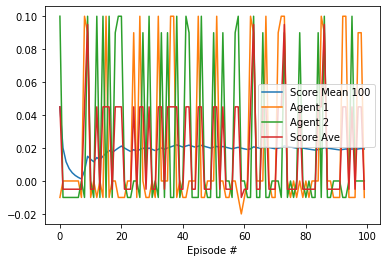

Episode 200(0sec)	 MIN:-0.01 MAX:0.00 MEAN:-0.00 MEANo100:0.02
Episode 200	Average Score: 0.02


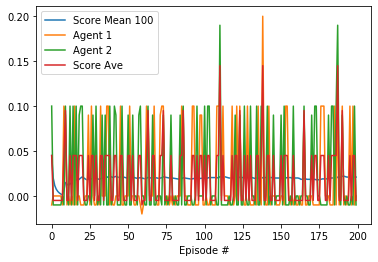

Episode 300(3sec)	 MIN:-0.01 MAX:0.00 MEAN:-0.00 MEANo100:-0.00
Episode 300	Average Score: -0.00


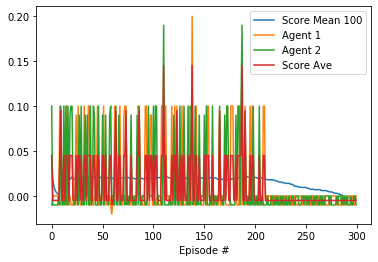

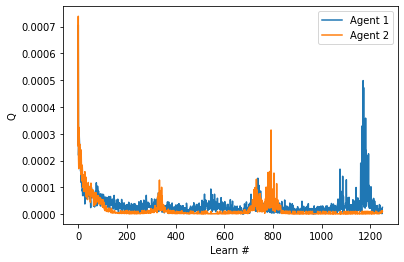

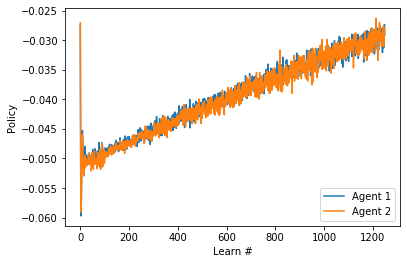

In [13]:
scores_ave, agent = train(n_episodes=300, random_seed=SEED)

In [14]:
# trained model
# play times
t = 10
for i in range(t):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = agent.act(states, add_noise=False)                  # all actions between -1 and 1
#         print('states', states)
#         print('actions', actions)
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 0: 0.0
Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.0
Score (max over agents) from episode 6: 0.0
Score (max over agents) from episode 7: 0.0
Score (max over agents) from episode 8: 0.0
Score (max over agents) from episode 9: 0.0


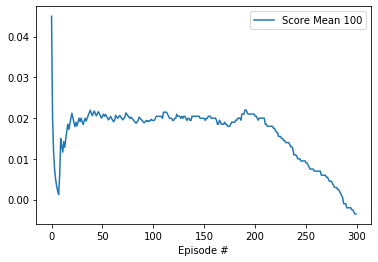

In [15]:
fig, ax = plt.subplots()

plt.plot(np.arange(len(scores_ave)), scores_ave, label='Score Mean 100')
plt.xlabel('Episode #')

ax.legend()
plt.show()


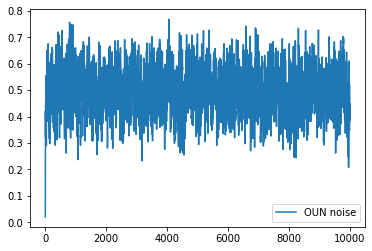

In [16]:
# To test OUNoise hyperparameters
oun = OUNoise(size=1, seed=1, mu=-0., theta=0.15, sigma=0.15)
cnt = 10000
result = []
for _ in range(cnt):
    r = oun.sample()
    result.append(r)

fig, ax = plt.subplots()
plt.plot(np.arange(cnt), result, label='OUN noise')

ax.legend()
plt.show()

In [17]:
# test noise
test_agent = Agent(state_size=state_size, action_size=action_size, 
                   num_agents=num_agents, random_seed=1)

for i in range(20):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    test_agent.reset()
    while True:
        actions = test_agent.act(states, add_noise=True)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 0: 0.0
Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.10000000149011612
Score (max over agents) from episode 4: 0.09000000171363354
Score (max over agents) from episode 5: 0.10000000149011612
Score (max over agents) from episode 6: 0.10000000149011612
Score (max over agents) from episode 7: 0.0
Score (max over agents) from episode 8: 0.0
Score (max over agents) from episode 9: 0.0
Score (max over agents) from episode 10: 0.0
Score (max over agents) from episode 11: 0.10000000149011612
Score (max over agents) from episode 12: 0.10000000149011612
Score (max over agents) from episode 13: 0.09000000171363354
Score (max over agents) from episode 14: 0.10000000149011612
Score (max over agents) from episode 15: 0.0
Score (max over agents) from episode 16: 0.10000000149011612
Score (max over agents) from episode 17: 0.10000000149011612
Score (max over agents) from episode 18:

In [18]:
env.close()